In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
cheetah_experiment_path = 'HalfCheetah/runs/exp_2025-02-22_14-19-20'
pendulum_experiment_path = 'Pendulum/runs/exp_2025-02-22_15-31-24'


In [3]:
cheetah_event_acc = EventAccumulator(cheetah_experiment_path)
cheetah_event_acc.Reload()

pendulum_event_acc = EventAccumulator(pendulum_experiment_path)
pendulum_event_acc.Reload()


In [4]:
scalar_tags = cheetah_event_acc.Tags()['scalars']
print("Available Scalars:", scalar_tags)

Available Scalars: ['Training/Eps_Score', 'Training/Avg_Score', 'Training/Avg_Min_Q', 'Training/Avg_Entropy', 'Training/A*logP']


In [5]:
cheetah_rewards = cheetah_event_acc.Scalars('Training/Avg_Score') 

cheetah_reward_steps = [item.step for item in cheetah_rewards]
cheetah_reward_values = [item.value for item in cheetah_rewards]

cheetah_episode_rewards = cheetah_event_acc.Scalars('Training/Eps_Score')  

cheetah_episodes = [item.step for item in cheetah_episode_rewards]
cheetah_episode_reward_values = [item.value for item in cheetah_episode_rewards]

pendulum_episode_rewards = pendulum_event_acc.Scalars('Training/Eps_Score')

pendulum_episodes = [item.step for item in pendulum_episode_rewards]
pendulum_episode_reward_values = [item.value for item in pendulum_episode_rewards]



In [6]:
def plot_white_background(steps, rewards_list, labels, title, x_label='Step', y_label='Average Episode Reward', sigma=5, y_ticks=15, legend_title=''):


    sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': 'grey', 'grid.linestyle': '-', 'grid.alpha': 0.5})

    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    ax.set_facecolor('white')  

    colors = ['green', 'red', 'purple', 'orange','blue']

    for i, (rewards, label) in enumerate(zip(rewards_list, labels)):
        # Apply Gaussian smoothing
        smoothed_rewards = gaussian_filter1d(rewards, sigma=sigma)

        # Calculate standard deviation for shaded area
        std_dev = np.std(rewards) * 0.2

        # Plot the smoothed line
        plt.plot(steps, smoothed_rewards, label=label, color=colors[i % len(colors)], linewidth=1)

        # Fill between for CI (standard deviation)
        plt.fill_between(steps, smoothed_rewards - std_dev, smoothed_rewards + std_dev,
                         color=colors[i % len(colors)], alpha=0.2)

    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    legend = plt.legend(frameon=True, fancybox=True, framealpha=0.5, fontsize=10, loc='best', title=legend_title, title_fontsize=12)
    
    ax.yaxis.set_major_locator(MaxNLocator(nbins=y_ticks))
    
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.grid(True, color='grey', linestyle='-', alpha=0.5)

    plt.tight_layout()
    plt.show()

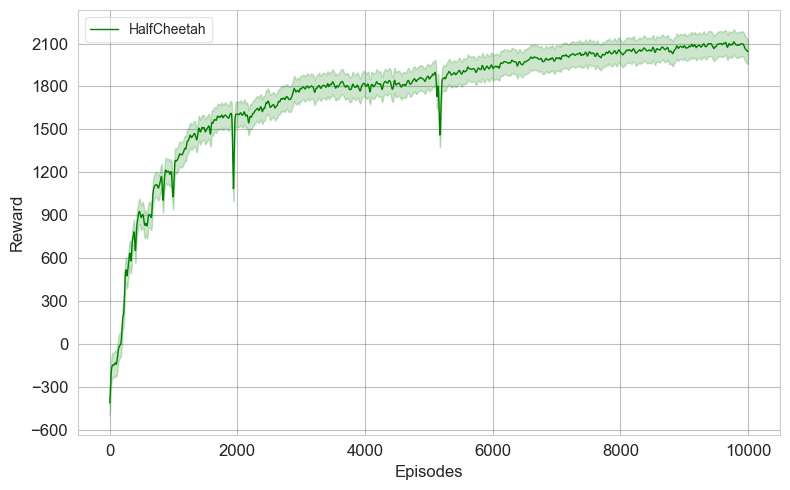

In [7]:
plot_white_background(cheetah_episodes,
                 [cheetah_episode_reward_values],
                 labels=['HalfCheetah'],
                 title='',
                 x_label='Episodes',
                 y_label='Reward',
                 sigma=10,
                 y_ticks=11)

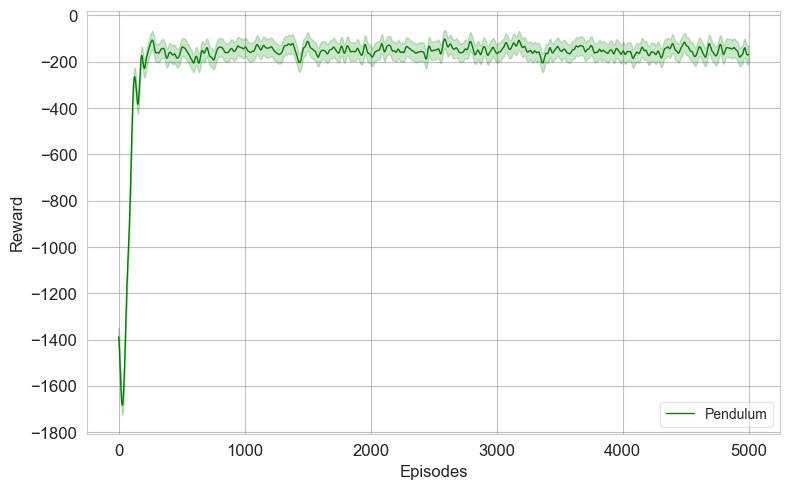

In [8]:
plot_white_background(pendulum_episodes,
                 [pendulum_episode_reward_values],
                 labels=['Pendulum'],
                 title='',
                 x_label='Episodes',
                 y_label='Reward',
                 sigma=10, y_ticks=11)

In [10]:
main_exp_path = 'Hockey/runs'

exp_list = ['TE_4_2025-02-21_23-30-13','TE_3_2025-02-22_01-15-01', 'TE_2_2025-02-22_13-30-16', 'TE_1_2025-02-22_16-08-17', 'TE_0_2025-02-23_00-37-09']

data_paths = [os.path.join(main_exp_path, exp) for exp in exp_list]

event_acc = [EventAccumulator(data_path) for data_path in data_paths]
event_acc = [event.Reload() for event in event_acc]


rewards_list = [event.Scalars('Training/Eps_Score') for event in event_acc] 
entropy_list = [event.Scalars('Training/A*logP') for event in event_acc]


In [11]:

reward_steps = [[item.step for item in rewards] for rewards in rewards_list]
reward_values = [[item.value for item in rewards] for rewards in rewards_list]




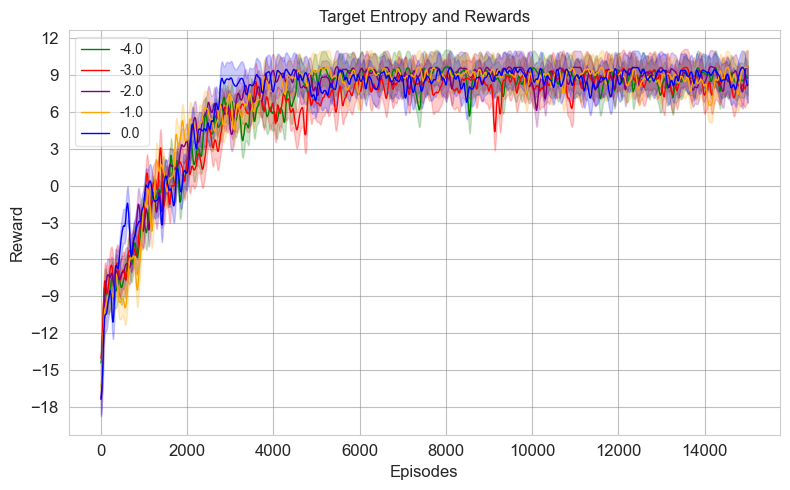

In [12]:
plot_white_background(reward_steps[0],
                 reward_values,
                 labels=['-4.0', '-3.0', '-2.0', '-1.0', '0.0'],
                 title='Target Entropy and Rewards',
                 x_label='Episodes',
                 y_label='Reward',
                 sigma=20, y_ticks=12)

In [13]:
entropy_steps = [[item.step for item in entropy] for entropy in entropy_list]
entropy_values = [[item.value for item in rewards] for rewards in entropy_list]

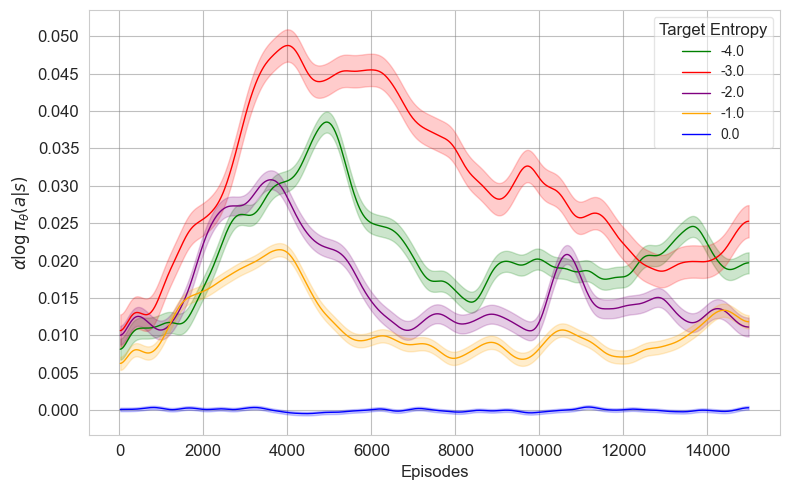

In [14]:
plot_white_background(entropy_steps[0],
                 entropy_values,
                 labels=['-4.0', '-3.0', '-2.0', '-1.0', '0.0'],
                 title='',
                 x_label='Episodes',
                 y_label= r'$\alpha \log \pi_\theta(a|s)$',
                 sigma=10, y_ticks=12, legend_title='Target Entropy')